## Modeling 코드
### 주제 1: 머신러닝 기반 매출의 영향 요인 분석
- feature: 버스정류장 개수, 지하철역 개수, 경쟁점 개수, 상업지역 비율, 주거지역 비율, 인구수, 유동인구비율
    - feature Engineer: VIF 확인
- target: 깐부치킨, 생활맥주
    - 깐부치킨: 인구당 매출 > 2500 (성공), 인구당 매출 < 500 (실패)
- y = 성공(1) or 실패(0)

In [1]:
## import module
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

## Load Data
gganbu = pd.read_csv("../../../resources/processedData/깐부치킨_입지특성_모델_feature.csv", encoding='utf8')

In [2]:
gganbu

,매장코드,행정동,매장명,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,주거지역 비율,인구수,유동인구비율,인구당매출,y
0,T06644,청담동,(주)깐부 청담본점,13,2,10,0.401674,0.577653,30014,1.42,2662.957,1
1,T50791,세곡동,(주)깐부치킨(세곡점),21,0,7,0.163217,0.779494,45160,0.94,279.949,0
2,T79908,신사동,깐부치킨 신사가로수점,7,0,8,0.320944,0.624547,17541,2.14,3005.986,1
3,S48814,역삼2동,깐부치킨(강남세브란스점),20,0,11,0.285410,0.685366,36560,1.36,402.694,0
4,S35539,삼성1동,깐부치킨(삼성1동점),11,7,9,0.336420,0.648843,14811,3.02,2799.710,1
5,S24077,삼성1동,깐부치킨(삼성점),17,1,21,0.441027,0.558259,14811,3.02,2644.724,1
6,S31130,대치4동,깐부치킨(선릉역1번출구점),21,16,28,0.003526,0.603634,20773,1.62,2582.010,1
7,T74630,신사동,깐부치킨(신사역점),12,8,21,0.368677,0.621461,17541,2.14,3305.399,1
8,T78908,신사동,깐부치킨(압구정한강고수부지),0,0,0,0.034060,0.713664,17541,2.14,393.706,0
9,S42681,신사동,깐부치킨(압구정현대백화점),12,5,9,0.386134,0.595838,17541,2.14,2599.225,1


In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# set X,y
X = gganbu[["버스정류장 개수", "지하철역 개수",  "상업지역 비율","경쟁점 개수", "주거지역 비율", "인구수",  "유동인구비율"]]
y = gganbu["y"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

"""
DT인데 굳이 Scailing 필요?
# Standardized data
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
"""

ggabu_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
ggabu_tree.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_pred_tr = ggabu_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))
print(y_test, y_pred_tr)

Accuracy: 0.75
6     1
11    0
4     1
10    0
Name: y, dtype: int64 [1 1 1 0]


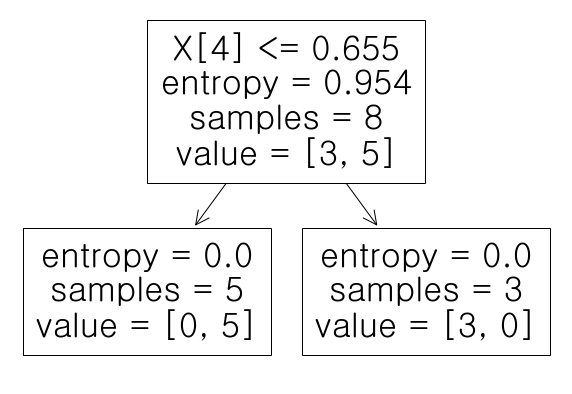

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(ggabu_tree)
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegression
# Standardized data
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

ggabu_lr = LogisticRegression()
ggabu_lr.fit(X_train_std, y_train)

print(ggabu_lr.score(X_train_std, y_train))
y_pred_lr = ggabu_tree.predict(X_test_std)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_lr))
print(ggabu_lr.coef_)

1.0
Accuracy: 0.50
[[-0.17299897  0.377128    0.73256275  0.29764678 -0.73682131 -0.42742059
   0.28410372]]


c:\Users\dksle\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [9]:
from sklearn.ensemble import RandomForestClassifier

ggabu_rf = RandomForestClassifier()
ggabu_rf.fit(X_train, y_train)
y_pred_rf = ggabu_rf.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_rf))

Accuracy: 0.75


In [18]:
## Cross-validation 진행 (데이터가 적기때문에 증대 효과 기대)
from sklearn.model_selection import KFold
import numpy as np

# cross-validation def 선언
k = 5

import time

# Cross Validation Def
def cross_validation(model, X, y):
  start = time.time() # 시작 시간
  cv_accuracy=[]
  n_iter = 0
  
  for train_index, test_index in KFold(k).split(X):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4) # 소수점 4자리 반올림
    train_size = x_train.shape[0]
    test_size = x_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 : {1},  학습 데이터 크기 : {2},  검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
  print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

  return cv_accuracy

In [21]:
# Cross-valid 결과
print("***Decision Tree***")
acc_gganbu_dt_cv = cross_validation(ggabu_tree,X.values,y)


***Decision Tree***

#1 교차 검증 정확도 : 0.6667,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#3 검증 세트 인덱스 : [6 7]

#4 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#4 검증 세트 인덱스 : [8 9]

#5 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#5 검증 세트 인덱스 : [10 11]

## 평균 검증 정확도: 0.63334


In [20]:
# 표준화된 데이터셋
X_std = sc.fit_transform(X)

print("***Logistic Regression***")
acc_gganbu_lr_cv = cross_validation(ggabu_lr,X_std,y)

print("***RandomForest***")
acc_gganbu_xgb_cv = cross_validation(ggabu_rf,X_std,y)

***Logistic Regression***

#1 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#3 검증 세트 인덱스 : [6 7]

#4 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#4 검증 세트 인덱스 : [8 9]

#5 교차 검증 정확도 : 0.0,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#5 검증 세트 인덱스 : [10 11]

## 평균 검증 정확도: 0.6
***RandomForest***

#1 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#1 검증 세트 인덱스 : [0 1 2]

#2 교차 검증 정확도 : 1.0,  학습 데이터 크기 : 9,  검증 데이터 크기 : 3
#2 검증 세트 인덱스 : [3 4 5]

#3 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#3 검증 세트 인덱스 : [6 7]

#4 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#4 검증 세트 인덱스 : [8 9]

#5 교차 검증 정확도 : 0.5,  학습 데이터 크기 : 10,  검증 데이터 크기 : 2
#5 검증 세트 인덱스 : [10 11]

## 평균 검증 정확도: 0.7
